# PyTorch Geometric examples

Tutorial link: [pytorch-geometric.readthedocs.io](https://pytorch-geometric.readthedocs.io/en/latest/get_started/introduction.html)


In [6]:
import torch
from torch_geometric.data import Data

In [2]:
# [[source], [target]]
# In both directions
# Edges:
edge_index = torch.tensor([[0, 1, 1, 2],
                           [1, 0, 2, 1]], dtype=torch.long)
# Nodes:
x = torch.tensor([[-1], [0], [1]], dtype=torch.float)
data = Data(x=x, edge_index=edge_index)

In [15]:
import networkx as nx
from torch_geometric import utils
import matplotlib.pyplot as plt

Graph with 3 nodes and 2 edges


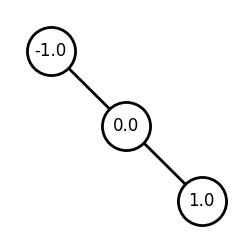

In [63]:
g = utils.to_networkx(data, 
                      to_undirected=True, 
                      node_attrs=['x'],
                    )
fig, ax = plt.subplots(figsize=(3, 3))
ax.margins(0.20)
ax.axis('off')
# Show node values ``labels'':
node_states = nx.get_node_attributes(g, 'x')
print(g)
nx.draw(g, 
        with_labels=True, 
        labels=node_states,
        edgecolors='black', 
        node_color='white', 
        node_size=1200,
        linewidths=2,
        width=2,
    )
plt.draw()

In [43]:
# In index tuple format
# Need both direction!
edge_index = torch.tensor([[0, 1],
                           [1, 0],
                           [1, 2],
                           [2, 1]], dtype=torch.long)
x = torch.tensor([[-1], [0], [1]], dtype=torch.float)

data = Data(x=x, edge_index=edge_index.t().contiguous())

In [44]:
data.validate(raise_on_error=True)

True

In [50]:
print(data.keys)

['edge_index', 'x']


In [51]:
print(data['x'])

tensor([[-1.],
        [ 0.],
        [ 1.]])


In [64]:
for key, item in data:
    print(f'{key}')

x
edge_index


In [66]:
print(f'# of nodes: {data.num_nodes}')
print(f'# of edges: {data.num_edges}')
print(f'# of edge feature: {data.num_edge_features}')
print(f'Has isolated nodes: {data.has_isolated_nodes()}')
print(f'Has self loops: {data.has_self_loops()}') # E.g., A-A is a self-loop
print(f'Is directed: {data.is_directed()}')

# of nodes: 3
# of edges: 4
# of edge feature: 0
Has isolated nodes: False
Has self loops: False
Is directed: False


In [67]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
data = data.to(device)

cuda
